In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
radians()

ValueError: invalid number of arguments

In [2]:
nodes = {}

In [3]:
nodes[1] = { 'conns' : [], 'theta' : rand()*360 , 'pos' : 1}

In [4]:
nodes[2] = {'conns' : [1], 'theta' : rand()*360, 'pos': 2 }
nodes[1]['conns'].append(2)

In [5]:
nodes[3] = {'conns' : [1,2], 'theta' : rand()*360, 'pos' : 3 }
for v in nodes[3]['conns']:
    if 3 not in nodes[v]['conns']:
        nodes[v]['conns'].append(3)

In [6]:
n = 4
m = 2
m_put = 0
nodes[n] = {'conns' : [], 'theta' : rand()*360, 'pos' : n } 
while m_put < m:
    v = choice(list(nodes.keys()))
    if v not in nodes[n]['conns'] and v != n:
        nodes[n]['conns'].append(v)
        m_put +=1
for v in nodes[n]['conns']:
    if n not in nodes[v]['conns']:
        nodes[v]['conns'].append(n)

In [7]:
n = 5
m = 2
m_put = 0
nodes[n] = {'conns' : [], 'theta' : rand()*360, 'pos': n  } 
while m_put < m:
    v = choice(list(nodes.keys()))
    if v not in nodes[n]['conns']:
        nodes[n]['conns'].append(v)
        m_put +=1
for v in nodes[n]['conns']:
    if n not in nodes[v]['conns']:
        nodes[v]['conns'].append(n)

In [2]:
import operator
x = {'a': 2, 'b': 4, 'c': 3, 'd': 1, 'r': 0}
sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [9]:
sorted_x

[('r', 0), ('d', 1), ('a', 2), ('c', 3), ('b', 4)]

In [10]:
nodes

{1: {'conns': [2, 3, 4], 'theta': 312.63245942245334, 'pos': 1},
 2: {'conns': [1, 3, 4], 'theta': 139.00440152953672, 'pos': 2},
 3: {'conns': [1, 2, 5], 'theta': 298.1912926341971, 'pos': 3},
 4: {'conns': [2, 1, 5], 'theta': 304.23076559351983, 'pos': 4},
 5: {'conns': [3, 4], 'theta': 231.05151468897603, 'pos': 5}}

In [13]:
n = 6
m = 2
m_put = 0
nodes[n] = {'conns' : [], 'theta' : rand()*360, 'pos' : n } 
dists = {}
for key in nodes.keys():
    if key!=n:
        dists[key] = log(nodes[n]['pos']*nodes[key]['pos']*abs(radians(nodes[n]['theta']-nodes[key]['theta']))*0.5)
sorted_dists = sorted(dists.items(), key=operator.itemgetter(1))
print(sorted_dists)

while m_put < m:
    v = sorted_dists[m_put][0]
    if v not in nodes[n]['conns']:
        nodes[n]['conns'].append(v)
        m_put +=1
    print('added:', v)

for v in nodes[n]['conns']:
    if n not in nodes[v]['conns']:
        nodes[v]['conns'].append(n)

[(2, 2.6263927321411638), (1, 2.7727793715426357), (3, 3.8229893420356955), (5, 4.071713944112136), (4, 4.131199595993433)]
added: 2
added: 1


In [24]:
def add_node(nodes, n, m, T):
    m_put = 0
    nodeid = 0
    nodes[n] = {'conns' : [], 'theta' : rand()*360, 'pos': n } 
    dists = {}
    for key in nodes.keys():
        if key!=n:
            dists[key] = log(nodes[n]['pos']*nodes[key]['pos']
                             *abs(radians(nodes[n]['theta']-nodes[key]['theta']))*0.5)
    sorted_dists = sorted(dists.items(), key=operator.itemgetter(1))
    #print(sorted_dists)

    while m_put < m:
        try:
            v = sorted_dists[nodeid][0]
            if v not in nodes[n]['conns']:
                prob = 1/(1 + exp((sorted_dists[nodeid][1]-log(n))/T ))
                r = rand()
                if r<=prob:
                    nodes[n]['conns'].append(v)
                    m_put +=1
                    nodeid +=1
                else:
                    #print("Unable to attach:", prob, r, ' nodeid:', nodeid)
                    nodeid +=1
            #print('added:', v)
        except IndexError:
            #print('not enough nodes yet')
            m_put = m

    for v in nodes[n]['conns']:
        if n not in nodes[v]['conns']:
            nodes[v]['conns'].append(n)
    return nodes

In [15]:
rand()

0.15359677497185587

In [16]:
nodes

{1: {'conns': [2, 3, 4, 6], 'theta': 312.63245942245334, 'pos': 1},
 2: {'conns': [1, 3, 4, 6], 'theta': 139.00440152953672, 'pos': 2},
 3: {'conns': [1, 2, 5, 6], 'theta': 298.1912926341971, 'pos': 3},
 4: {'conns': [2, 1, 5], 'theta': 304.23076559351983, 'pos': 4},
 5: {'conns': [3, 4], 'theta': 231.05151468897603, 'pos': 5},
 6: {'conns': [2, 1], 'theta': 6.996704996647969, 'pos': 6}}

In [18]:
add_node(7,2,)

TypeError: add_node() missing 2 required positional arguments: 'm' and 'T'

In [19]:
add_node(8,2)

TypeError: add_node() missing 2 required positional arguments: 'm' and 'T'

In [38]:
rand()

0.9642855452989547

In [4]:
def plotnodes(nodes, delta, save_as = None):
    figsize(8,8)
    ax = plt.subplot(111, projection='polar')
    ax.plot([radians(nodes[key]['theta']) for key in nodes.keys()],
            [log(nodes[key]['pos']) for key in nodes.keys()], 'o')

    for key in nodes.keys():
        for v in nodes[key]['conns']:
            ax.plot([radians(nodes[key]['theta']), radians(nodes[v]['theta'])], 
                    [log(nodes[key]['pos']), log(nodes[v]['pos'])], color = 'red')

    for key in nodes.keys():
        ax.text(radians(nodes[key]['theta']) , log(nodes[key]['pos']) , key)
        ax.arrow(radians(nodes[key]['theta']) , log(nodes[key]['pos']), 0, delta)


    ax.grid(True)
    if save_as is not None:
        plt.tight_layout()
        plt.savefig(save_as, dpi  =200)
    plt.show()

In [21]:
nodes = {}

In [23]:
for i in range(5):
    add_node(i+1,3, 2, 11)

TypeError: 'int' object does not support item assignment

In [24]:
plotnodes()

TypeError: plotnodes() missing 2 required positional arguments: 'nodes' and 'delta'

In [44]:
nodes[4039]

{'conns': [1392,
  3433,
  32,
  564,
  3631,
  2058,
  1401,
  3556,
  3794,
  2998,
  424,
  1812,
  1069,
  1840,
  2050,
  3807,
  855,
  1190,
  3390,
  3052,
  2065,
  3591],
 'theta': 288.26596426765826,
 'pos': 8.303752415563412}

In [25]:
print([nodes[key]['theta'] for key in nodes.keys()], [log(key) for key in nodes.keys()], 'o')

[] [] o


In [25]:
def step_nodes(nodes, beta, t):
    for key in nodes.keys():
        nodes[key]['pos'] = beta*log(key) + (1-beta)*log(t)
    return nodes

In [28]:
step_nodes(nodes, 0.1, )

TypeError: step_nodes() missing 1 required positional argument: 't'

In [39]:
log()

ValueError: invalid number of arguments

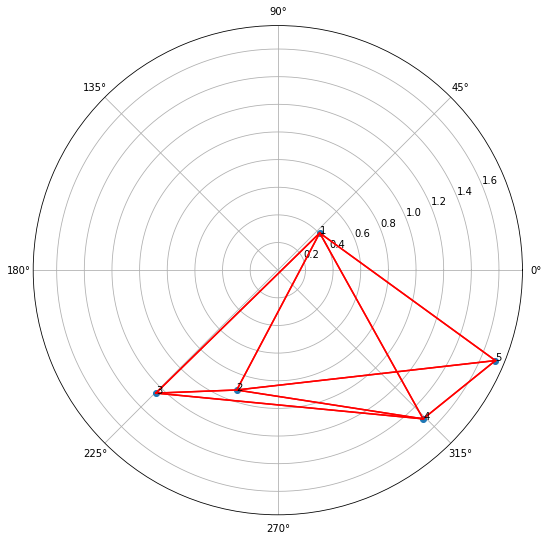

In [134]:
plotnodes()

In [271]:
nodes

{1: {'conns': [2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20],
  'theta': 212.9016109188899,
  'pos': 0.0},
 2: {'conns': [1, 3, 4, 7, 8, 9, 10, 12, 16, 17],
  'theta': 67.04782914892867,
  'pos': 0.6931471805599453},
 3: {'conns': [1, 2, 4, 5, 6, 11, 14, 15, 19, 20],
  'theta': 238.9990044285989,
  'pos': 1.0986122886681098},
 4: {'conns': [1, 3, 2, 5, 7, 9, 13, 18],
  'theta': 183.14379687009927,
  'pos': 1.3862943611198906},
 5: {'conns': [1, 4, 3, 6, 13, 18],
  'theta': 196.46718839471575,
  'pos': 1.6094379124341003},
 6: {'conns': [1, 3, 5, 11, 15],
  'theta': 235.94621200554008,
  'pos': 1.791759469228055},
 7: {'conns': [1, 2, 4, 8],
  'theta': 14.507432049171992,
  'pos': 1.9459101490553132},
 8: {'conns': [1, 7, 2, 10],
  'theta': 26.423856276600546,
  'pos': 2.0794415416798357},
 9: {'conns': [1, 2, 4, 16],
  'theta': 123.30405829372305,
  'pos': 2.1972245773362196},
 10: {'conns': [1, 2, 8, 12],
  't

In [35]:
def creategraph(n, m, beta, T, verbose = False):
    nodes = {}
    for i in range(n):
        nodes = add_node(nodes, i+1,m, T)
        nodes = step_nodes(nodes, beta,i+1)
        if verbose:
            if i%100 == 0 and i > 3:
                print(i)
                print(nodes[2]['pos'])
    return nodes

In [36]:
nodes = creategraph(4039, 22, 0.4, 1.55, verbose=True)

<ipython-input-24-d65a6938e632>:8: RuntimeWarning: divide by zero encountered in log
  dists[key] = log(nodes[n]['pos']*nodes[key]['pos']


100
3.046331182328734
200
3.4592418170594237
300
3.701525031073303
400
3.8736357286079195
500
4.007222532874897
600
4.116415832945102
700
4.208763604444732
800
4.288775440464994
900
4.359362026788981
1000
4.42251173981311
1100
4.479643354257586
1200
4.531804765471968


KeyboardInterrupt: 

In [34]:
nodes[1]

{'conns': [2,
  3,
  4,
  5,
  7,
  8,
  10,
  12,
  13,
  15,
  17,
  20,
  21,
  26,
  28,
  31,
  35,
  36,
  41,
  42,
  43,
  46,
  48,
  49,
  52,
  55,
  56,
  57,
  58,
  67,
  70,
  76,
  77,
  79,
  82,
  86,
  90,
  92,
  93,
  94,
  101,
  107,
  109,
  111,
  113,
  114,
  115,
  119,
  120,
  124,
  128,
  135,
  161,
  166,
  172,
  177,
  180,
  183,
  196,
  201,
  206,
  209,
  217,
  225,
  228,
  240,
  241,
  254,
  257,
  263,
  267,
  270,
  278,
  306,
  308,
  314,
  316,
  322,
  325,
  336,
  342,
  350,
  378,
  393,
  397,
  405,
  410,
  412,
  413,
  416,
  435,
  468,
  479,
  499,
  512,
  522,
  525,
  531,
  533,
  534,
  539,
  566,
  605,
  627,
  652,
  669,
  678,
  682,
  779,
  783,
  799,
  800,
  814,
  816,
  845,
  847,
  848,
  866,
  933,
  975,
  1009,
  1052,
  1103,
  1126,
  1139,
  1155,
  1157,
  1169,
  1201,
  1262,
  1264,
  1294,
  1346,
  1515,
  1625,
  1652,
  1676,
  1693,
  1702,
  1730,
  1748,
  1756,
  1786,
  1843,
  189

In [32]:
plotnodes(nodes,0)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9ba95db940> (for post_execute):


KeyboardInterrupt: 

In [33]:
nodes

{1: {'conns': [2,
   4,
   6,
   7,
   8,
   11,
   13,
   17,
   19,
   21,
   22,
   23,
   25,
   27,
   31,
   32,
   37,
   41,
   42,
   43,
   46,
   48,
   51,
   54,
   55,
   57,
   59,
   60,
   61,
   62,
   64,
   68,
   69,
   72,
   76,
   80,
   92,
   94,
   97,
   113,
   122,
   134,
   141,
   146,
   150,
   160,
   167,
   169,
   179,
   186,
   189,
   195,
   196,
   202,
   210,
   220,
   230,
   239,
   240,
   243,
   245,
   258,
   259,
   262,
   263,
   272,
   273,
   288,
   315,
   321,
   323,
   331,
   332,
   335,
   341,
   365,
   378,
   383,
   403,
   420,
   422,
   427,
   434,
   448,
   480,
   494,
   501,
   516,
   537,
   538,
   539,
   573,
   589,
   590,
   629,
   662,
   681,
   695,
   746,
   758,
   792,
   850,
   873,
   879,
   900,
   933,
   951,
   1059,
   1071,
   1111,
   1134,
   1174,
   1202,
   1244,
   1249,
   1298,
   1340,
   1451,
   1469,
   1517,
   1532,
   1568,
   1572,
   1579,
   1619,
   1631,
   16

In [34]:
def create_edgelist(nodes, save_as = 'edgelist.txt'):
    nodesc = nodes.copy()
    f = open(save_as, "w")
    for key in nodesc.keys():
        for v in nodesc[key]['conns']:
            f.write(str(key) + ' ' + str(v) + '\n')
            nodesc[v]['conns'].remove(key)
    f.close()

In [35]:
create_edgelist(nodes, 'edgelist_p.txt')

In [36]:
import networkx as nx

In [37]:
 g = nx.read_edgelist('edgelist_p.txt')

KeyboardInterrupt: 

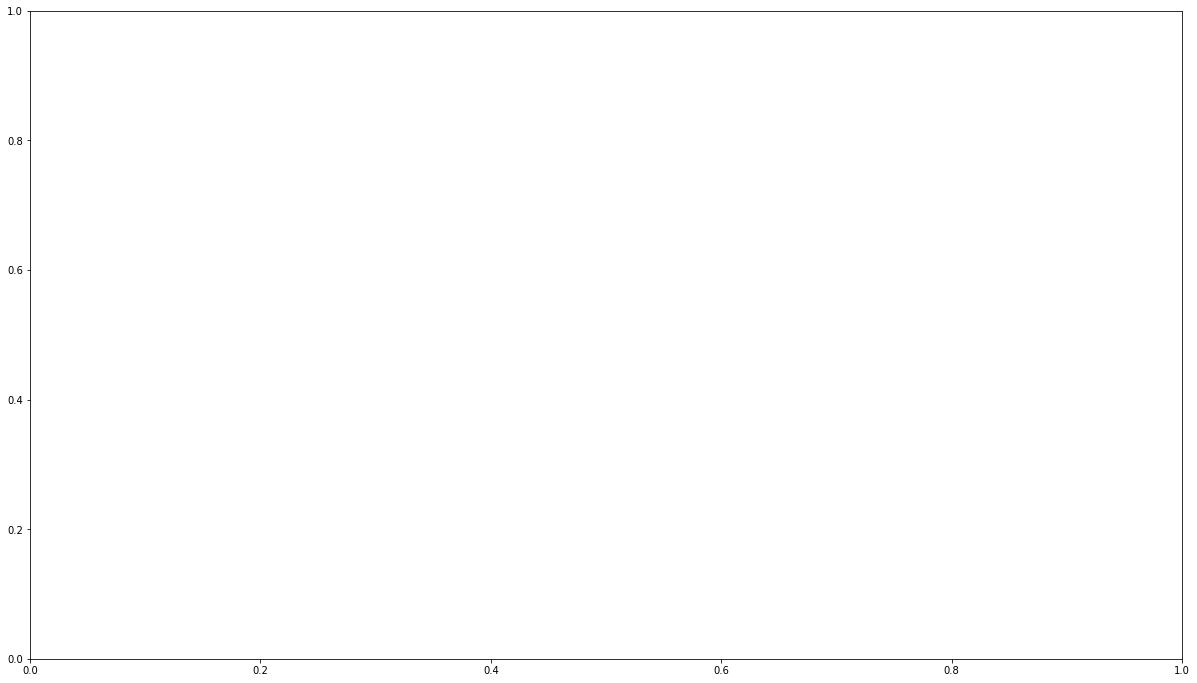

In [399]:
nx.draw(g)

In [38]:
degrees = dict(g.degree())
sum_of_edges = sum(list(degrees.values()))
print(sum_of_edges/len(list(g.nodes())))

43.65932161426095


In [39]:
nx.average_clustering(g)

0.6062000851748502

In [41]:
g.num_of_edges(4038)

NameError: name 'g' is not defined

In [460]:
len(list(g.edges()))

88208

In [410]:
import collections

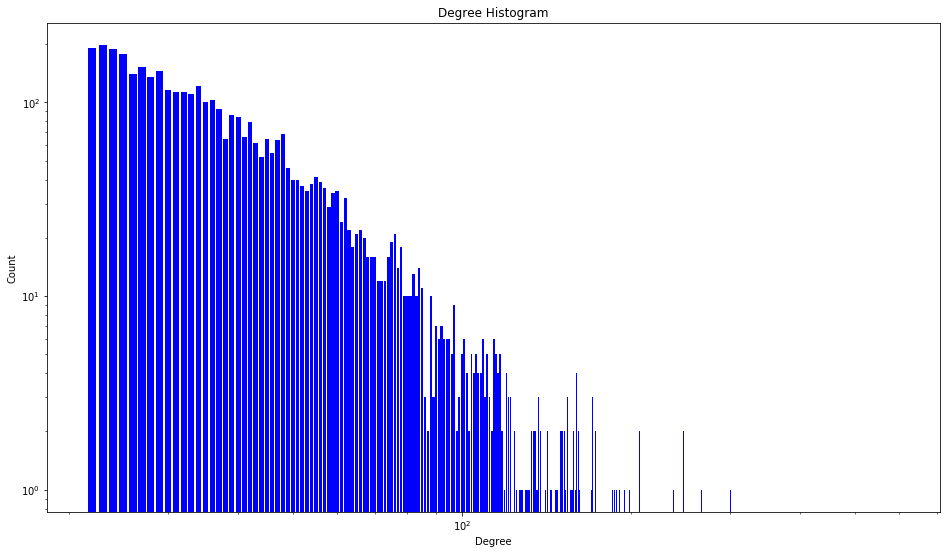

In [411]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
xscale('log')
yscale('log')

In [315]:
## TODO: temperature implementation

### Measuremnts

In [497]:
n, m, beta, T =  2000, 22, linspace(0, 1, 11), logspace(-0.301,1, 11 )
folder = 'edgelists'

In [498]:
results = {}

In [499]:
for b in beta:
    subres = []
    for t in T:
        nodes = creategraph(n, m, b, t)
        filename = folder + '/' + str(b) + str(t)
        create_edgelist(nodes, filename)
        g = nx.read_edgelist(filename)
        degrees = dict(g.degree())
        sum_of_edges = sum(list(degrees.values()))
        avgdeg = sum_of_edges/len(list(g.nodes()))
        clus = nx.average_clustering(g)
        numof_edges = len(list(g.edges()))
        subres.append([avgdeg, clus, numof_edges ])
        print('Beta: ' + str(b) + ', T: ' + str(t))
    results[b] = subres.copy()
    

/home/kfuruglyas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Beta: 0.0, T: 0.5000345349769785
Beta: 0.0, T: 0.6746833613988272
Beta: 0.0, T: 0.9103323996799096
Beta: 0.0, T: 1.2282874090578146
Beta: 0.0, T: 1.6572956864772073
Beta: 0.0, T: 2.236145198722521
Beta: 0.0, T: 3.017171522601772
Beta: 0.0, T: 4.070989666502737
Beta: 0.0, T: 5.492878591960478
Beta: 0.0, T: 7.411395679600759
Beta: 0.0, T: 10.0
Beta: 0.1, T: 0.5000345349769785
Beta: 0.1, T: 0.6746833613988272
Beta: 0.1, T: 0.9103323996799096
Beta: 0.1, T: 1.2282874090578146
Beta: 0.1, T: 1.6572956864772073
Beta: 0.1, T: 2.236145198722521
Beta: 0.1, T: 3.017171522601772
Beta: 0.1, T: 4.070989666502737
Beta: 0.1, T: 5.492878591960478
Beta: 0.1, T: 7.411395679600759
Beta: 0.1, T: 10.0
Beta: 0.2, T: 0.5000345349769785
Beta: 0.2, T: 0.6746833613988272
Beta: 0.2, T: 0.9103323996799096
Beta: 0.2, T: 1.2282874090578146
Beta: 0.2, T: 1.6572956864772073
Beta: 0.2, T: 2.236145198722521
Beta: 0.2, T: 3.017171522601772
Beta: 0.2, T: 4.070989666502737
Beta: 0.2, T: 5.492878591960478
Beta: 0.2, T: 7.411

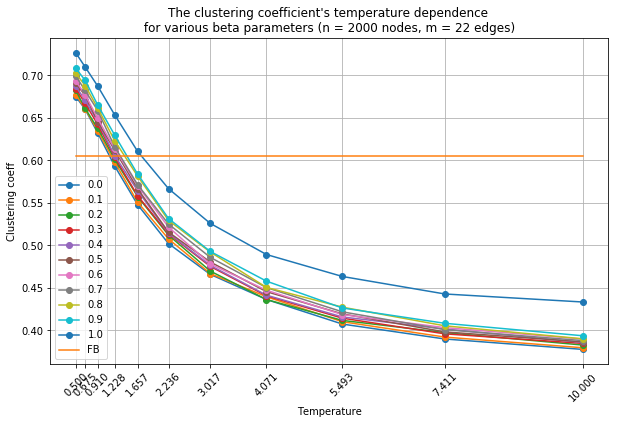

In [521]:
figsize(10,6)
grid()
for key in results.keys():
    plot(T,[ s[1] for s in results[key]], '-o', label = round(key,3) )
plot([T[0], T[-1]], [0.6055]*2, label='FB')
#plot([T[0], T[-1]], [0.5042]*2, label='AIR')
#plot([T[0], T[-1]], [0.145]*2, label='FLY')
legend(loc = 'best')
xlabel('Temperature')
ylabel('Clustering coeff')
xticks(T, rotation=45)
title('The clustering coefficient\'s temperature dependence \n for various beta parameters (n = 2000 nodes, m = 22 edges) ')
savefig('Clusteringcoeff_hyp.png', dpi = 400)

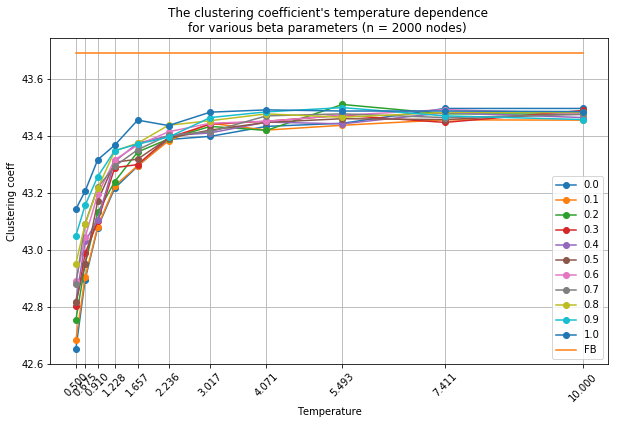

In [522]:
figsize(10,6)
grid()
for key in results.keys():
    plot(T,[ s[0] for s in results[key]], '-o', label = round(key,3) )
plot([T[0], T[-1]], [43.691]*2, label='FB')
#plot([T[0], T[-1]], [0.5042]*2, label='AIR')
#plot([T[0], T[-1]], [0.145]*2, label='FLY')
legend(loc = 'best')
xlabel('Temperature')
ylabel('Clustering coeff')
xticks(T, rotation=45)
title('The clustering coefficient\'s temperature dependence \nfor various beta parameters (n = 2000 nodes) ')
savefig('avgdeg_hyp.png', dpi = 400)

In [474]:
nodes = creategraph(n, m, beta[0], T[0])

0
100
200


/home/kfuruglyas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [475]:
create_edgelist(nodes, 'edgelist_p.txt')

In [476]:
 g = nx.read_edgelist('edgelist_p.txt')

In [477]:
degrees = dict(g.degree())
sum_of_edges = sum(list(degrees.values()))
print(sum_of_edges/len(list(g.nodes())))

42.647


In [478]:
nx.average_clustering(g)

0.6746056097829505

In [479]:
len(list(g.edges()))

42647

### Recreate fb

In [705]:
nodes = creategraph(4039, 22, 0.79, 1.745, verbose = True)

0
100
200


/home/kfuruglyas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000


In [706]:
create_edgelist(nodes, 'edgelist_p.txt')

In [707]:
 g = nx.read_edgelist('edgelist_p.txt')

In [708]:
degrees = dict(g.degree())
sum_of_edges = sum(list(degrees.values()))
print(sum_of_edges/len(list(g.nodes())))

43.70438227283981


In [709]:
nx.average_

0.6008608345574529

In [710]:
len(list(g.edges()))

88261

In [712]:
d = nx.closeness_centrality(g)

In [717]:
d.keys()

dict_keys(['1', '2', '3', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '20', '21', '23', '24', '26', '27', '28', '29', '31', '32', '34', '35', '36', '37', '41', '43', '44', '45', '46', '47', '48', '49', '52', '53', '54', '57', '58', '59', '62', '65', '66', '69', '70', '73', '74', '76', '77', '79', '80', '83', '84', '86', '87', '89', '91', '93', '94', '97', '98', '101', '102', '103', '105', '106', '110', '113', '115', '118', '119', '121', '123', '124', '126', '128', '129', '131', '134', '137', '139', '140', '141', '143', '145', '147', '149', '151', '155', '156', '157', '162', '165', '166', '170', '171', '174', '177', '179', '183', '185', '188', '191', '192', '198', '200', '201', '202', '209', '211', '213', '214', '215', '223', '224', '225', '226', '230', '232', '234', '236', '237', '239', '241', '245', '246', '251', '252', '253', '254', '257', '258', '260', '265', '268', '269', '272', '276', '277', '279', '281', '282', '285', '287', '290', '291', '292', '297', '298', '3

In [722]:
d_ = []
for k,v in d.items():
    d_.append(v)
print(mean(d_))

0.31028227631855965


In [723]:
e = nx.betweenness_centrality(g)

In [724]:
e_ = []
for k,v in e.items():
    e_.append(v)
print(mean(e_))

0.0005573992928144517


In [685]:
def plotter(g, node_colors = 'red', node_sizes = 100, save_as = None):
    figsize(32,19)
    eds = [(u, v) for (u, v, d) in g.edges(data=True)]

    pos = nx.spring_layout(g)  # positions for all nodes

    widths = []
    # nodes
    nx.draw_networkx_nodes(g, pos, node_size = node_sizes,  node_color = node_colors)

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=eds,
                         arrowstyle='->')

    # labels
    #nx.draw_networkx_labels(g, pos, font_size=25, font_family='sans-serif')

    #edge labels
    #nx.draw_networkx_edge_labels(g,pos,edge_labels=edges_labels,font_color='red')

    plt.axis('off')
    if save_as is not None:
        plt.savefig(save_as)
    plt.show()

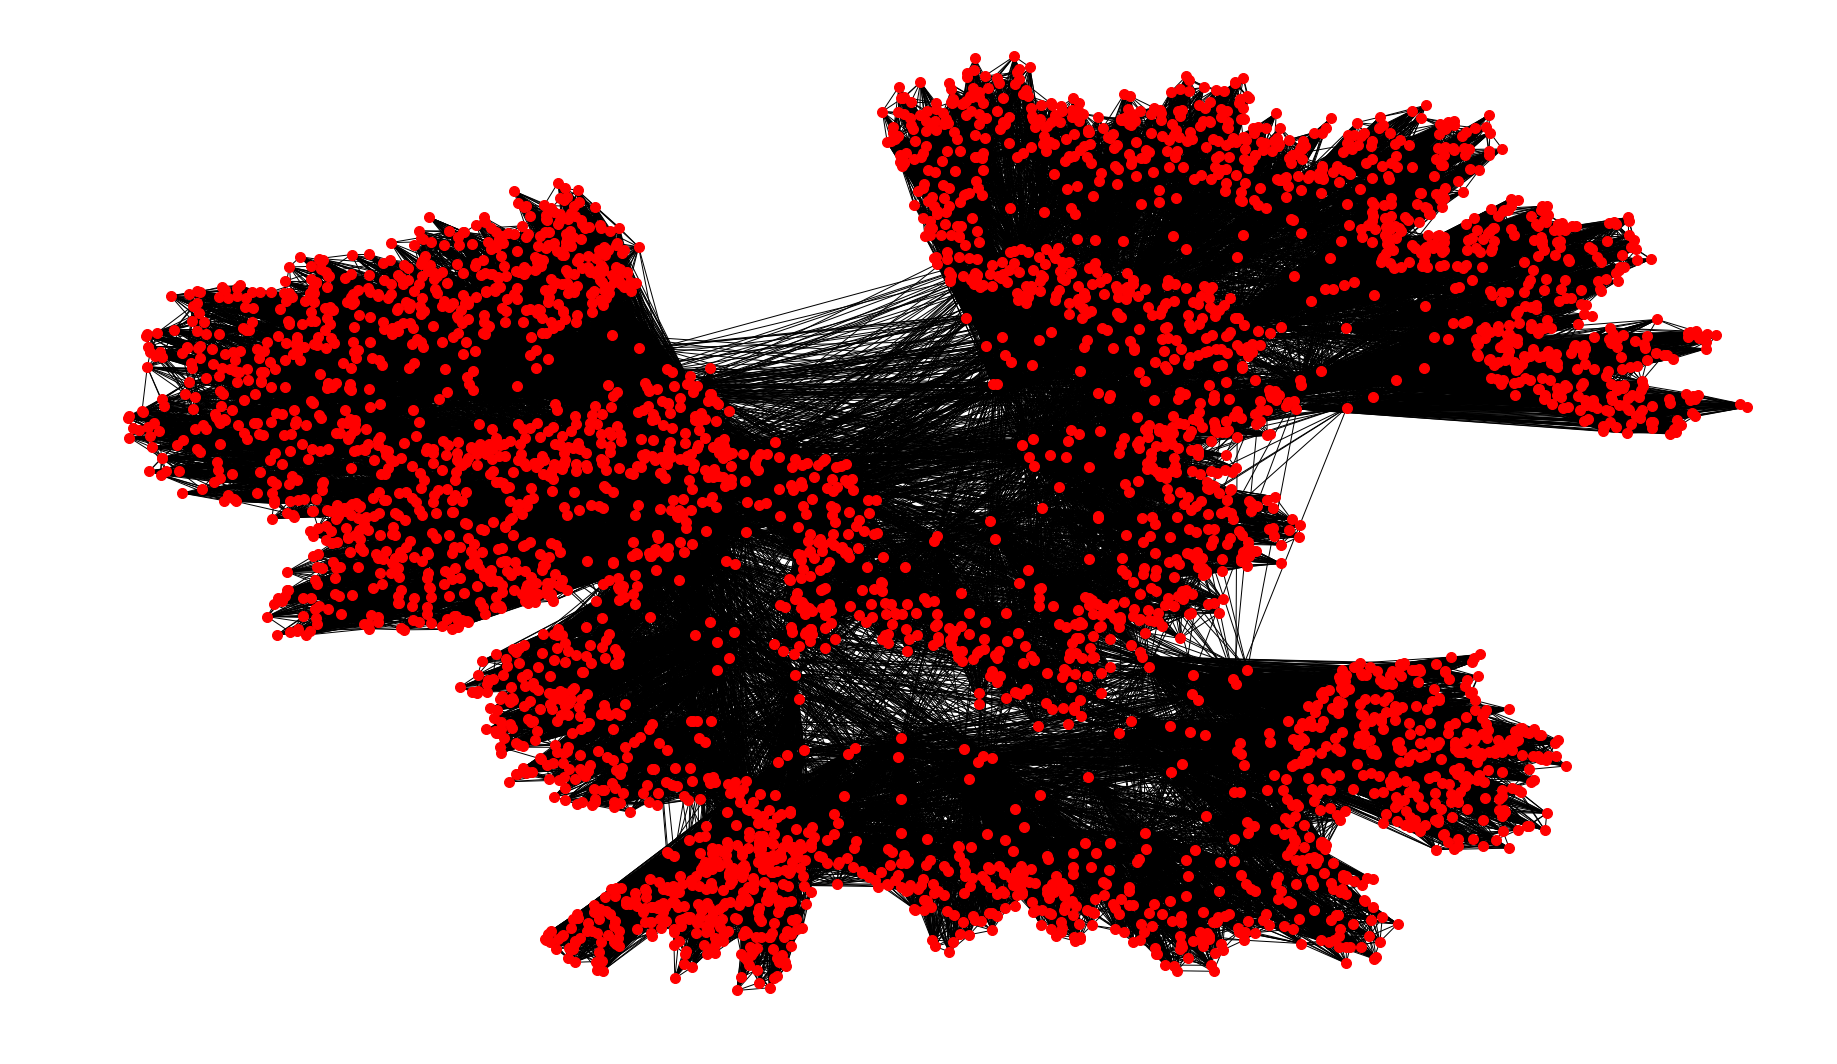

In [686]:
plotter(g, save_as = 'fb_recreated.png')

In [695]:
nodes = creategraph(20, 3, 0.79, 1.745, verbose = True)

0


/home/kfuruglyas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


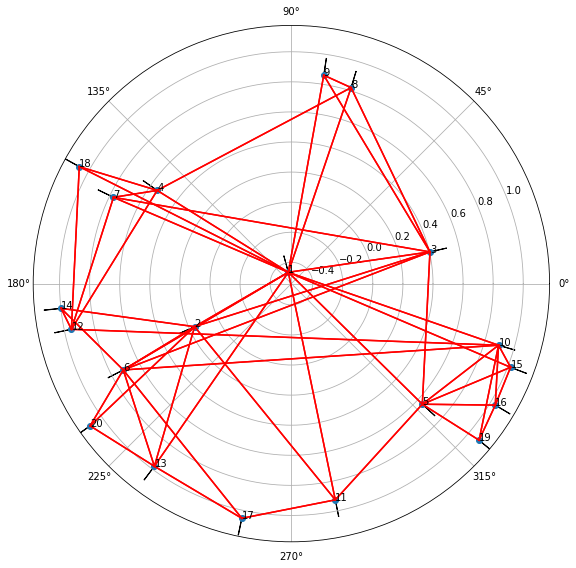

In [704]:
plotnodes(nodes,0.11, 'circular_graph.png',)
#savefig('circular_graph.png', dpi = 200)